### Easy Questions (Focusing on Coding Aspects of EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

%matplotlib inline

1. How do you load the House Prices dataset into a Pandas DataFrame?

In [2]:
df_train = pd.read_csv(r'C:\Users\jorda\Documents\studies\DScourse\CourseMaterials\Data\sberbank_russian_housing_market\house-prices-advanced-regression-techniques\train.csv')
df_train.shape

(1460, 81)

2. Write a code to display the first 10 rows of the dataset.

In [3]:
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


3. How can you check for missing values in the dataset?

In [4]:
missing_values = df_train[df_train.isnull()]
missing_values


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Show missing value count for columns with missing values sorted
missing_values = df_train.isnull()
missing_values_count = missing_values.sum().to_frame().reset_index()
missing_values_count.columns = ['column', 'missing #']
missing_values_count[missing_values_count['missing #'] != 0.0].reset_index(drop=True).sort_values(by='missing #')

,column,missing #
9,Electrical,1
3,MasVnrArea,8
4,BsmtQual,37
5,BsmtCond,37
7,BsmtFinType1,37
6,BsmtExposure,38
8,BsmtFinType2,38
15,GarageCond,81
14,GarageQual,81
13,GarageFinish,81


4. Write a Python script to calculate the mean, median, and standard deviation of 'SalePrice'.

In [6]:
df_train['SalePrice'].agg(['mean', 'median', 'std'],)

mean      180921.195890
median    163000.000000
std        79442.502883
Name: SalePrice, dtype: float64

5. Create a histogram of the 'LotArea' feature.

<Axes: xlabel='LotArea', ylabel='Count'>

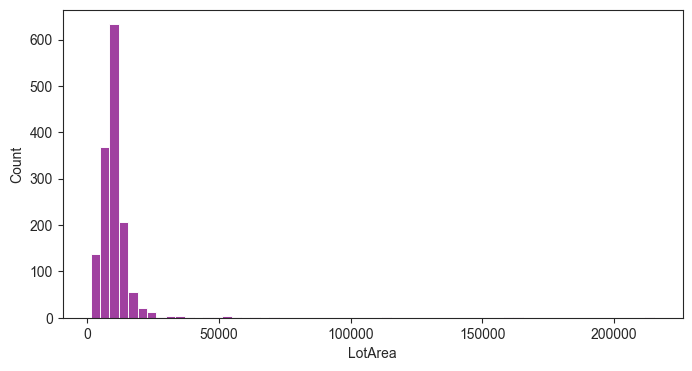

In [7]:
plt.figure(figsize=(8, 4))
sns.set_style(style='ticks')
sns.histplot(data=df_train['LotArea'], bins=60, color='purple')

6. How do you generate a box plot for the 'YearBuilt' feature using Seaborn?

<Axes: ylabel='YearBuilt'>

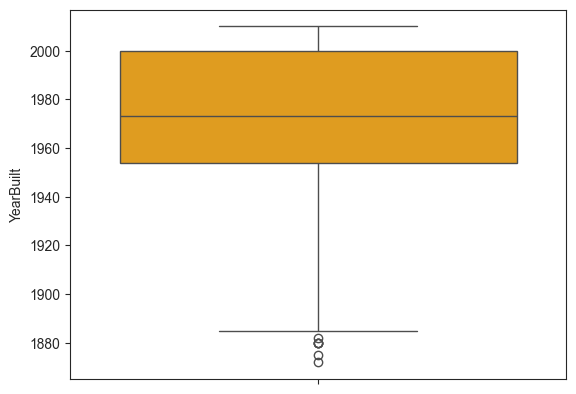

In [8]:
sns.boxplot(data=df_train['YearBuilt'], color='orange', )

7. Write a code to list all column names in the dataset.

In [9]:
columns = list(df_train.columns.values)

for column in columns:
    print(column)

Id
MSSubClass
MSZoning
LotFrontage
LotArea
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice


8. How can you filter out houses with 'SalePrice' above $300,000?

In [10]:
df_train = df_train[df_train['SalePrice'] <= 300000]
df_train.shape

(1345, 81)

9. Create a bar plot showing the count of houses for each 'OverallQual' rating.

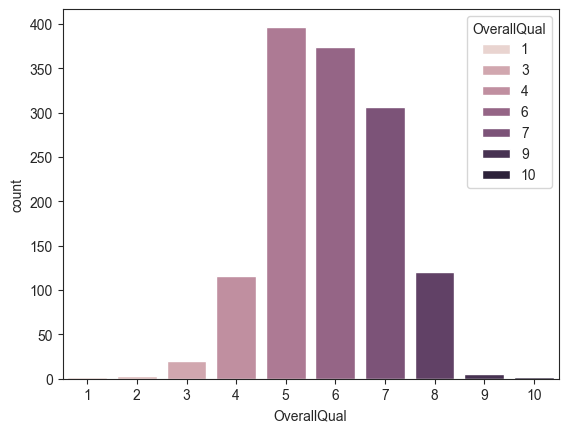

In [11]:
# Count number of houses in each rating
overallqual_count = df_train['OverallQual'].value_counts().to_frame().reset_index()

# Display count in bar plot
ax = sns.barplot(x=overallqual_count['OverallQual'], y=overallqual_count['count'], hue=overallqual_count['OverallQual'])

10. Write a Python script to display summary statistics for all numerical features.

In [12]:
# Select only numerical features via select_dtypes()
numerical_features = df_train.select_dtypes(['int64', 'float64']).drop(['Id'], axis=1)

# Display summary statistics
numerical_features.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1345.000000,1095.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1338.000000,1345.000000,1345.000000,...,1345.000000,1345.00000,1345.00000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000
mean,57.799257,68.312329,9988.828253,5.894424,5.600743,1969.055019,1983.325651,82.952915,401.678810,48.289219,...,85.495167,43.05948,23.04461,3.236431,14.607435,2.582156,47.207435,6.291450,2007.819331,164246.190335
std,43.273217,23.755211,7953.193257,1.215907,1.120892,29.867788,20.706771,152.573202,415.400874,160.977604,...,118.968403,63.95080,62.30530,28.775284,54.679591,39.048020,516.742981,2.693929,1.328795,52094.670262
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,57.000000,7314.000000,5.000000,5.000000,1951.000000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,128000.000000
50%,50.000000,67.000000,9196.000000,6.000000,5.000000,1970.000000,1991.000000,0.000000,358.000000,0.000000,...,0.000000,20.00000,0.00000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,156000.000000
75%,70.000000,80.000000,11207.000000,7.000000,6.000000,1998.000000,2003.000000,125.000000,663.000000,0.000000,...,156.000000,62.00000,0.00000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,196000.000000
max,190.000000,313.000000,164660.000000,10.000000,9.000000,2009.000000,2010.000000,1600.000000,5644.000000,1127.000000,...,736.000000,547.00000,552.00000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,299800.000000


### Medium Questions (Gaining Insights from EDA)

11. Analyze the distribution of 'SalePrice' and identify its skewness.

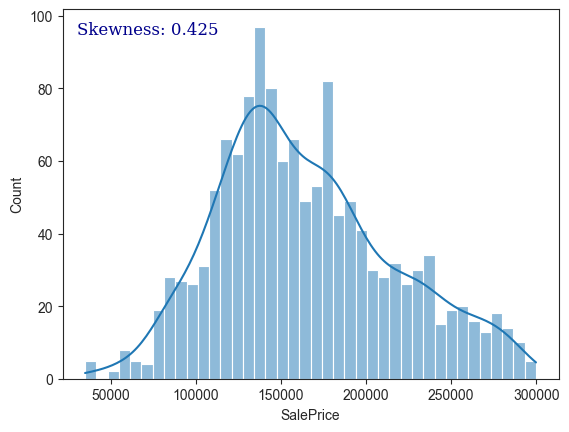

In [13]:
# Calculate skewness of 'SalePrice'
sale_price_skewness = round(df_train['SalePrice'].skew(), 3)

# Display distribution of 'SalePrice' and its skewness
ax = sns.histplot(data=df_train['SalePrice'], bins=40, kde=True)
ax = ax.text(s=f"Skewness: {sale_price_skewness}", x=30000, y=95, fontdict={'size': 12, 'fontfamily': 'serif', 'color':'DarkBlue'})

The distribution of 'SalePrice' is skewed to the right by 0.425.

12. Explore the relationship between 'TotalBsmtSF' and 'SalePrice' using a scatter plot. What insights can you gather?

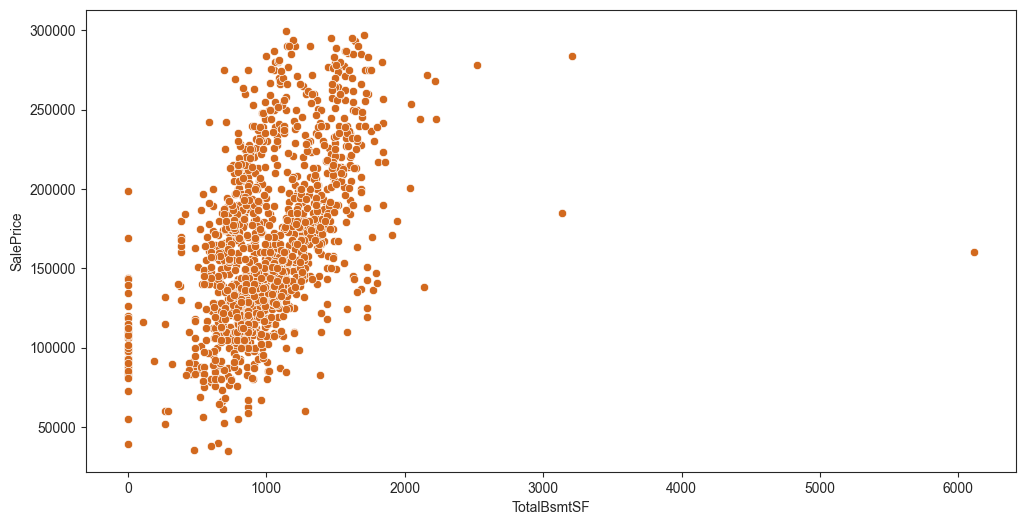

In [14]:
plt.figure(figsize=(12, 6))
ax = sns.scatterplot(x=df_train['TotalBsmtSF'], y=df_train['SalePrice'], color='chocolate')

First of all, there are houses that don't have a basement and they should not be included in this exploration

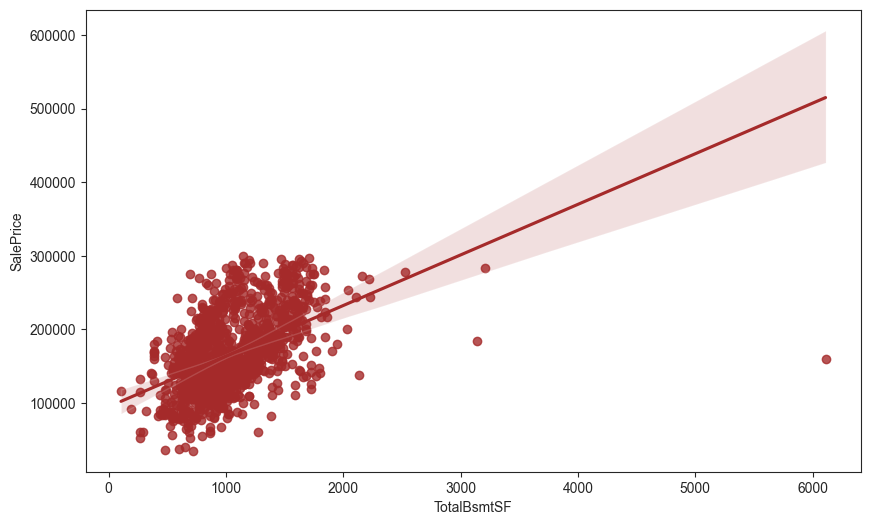

In [15]:
df_train_only_basement = df_train[df_train['TotalBsmtSF'] != 0]

plt.figure(figsize=(10, 6))
ax = sns.regplot(x=df_train_only_basement['TotalBsmtSF'], y=df_train_only_basement['SalePrice'], color='brown')

The scatter plot and the regression line show that the larger a house's basement the higher the sale price is. i.e. there is a positive linear dependency between 'TotalBsmtSF' and 'SalePrice'.

13. Investigate the impact of 'YearBuilt' on 'SalePrice' - does newer mean pricier?

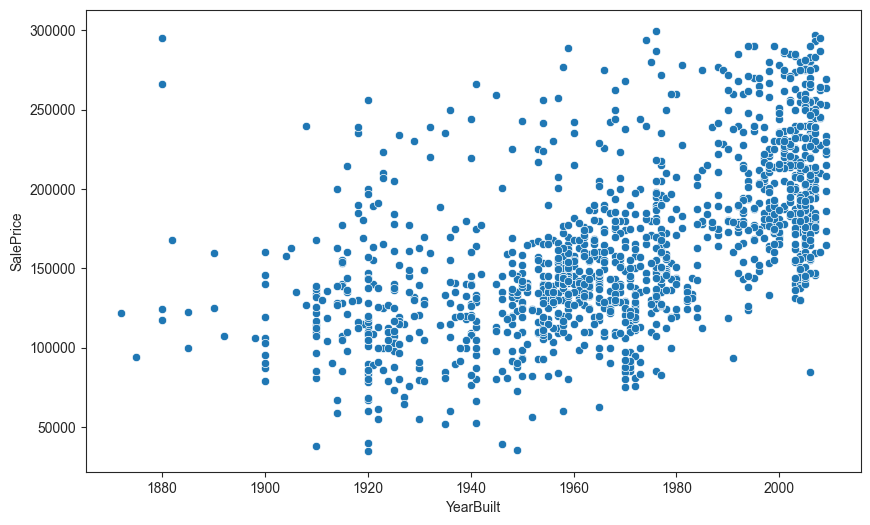

In [16]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x=df_train['YearBuilt'], y=df_train['SalePrice'])

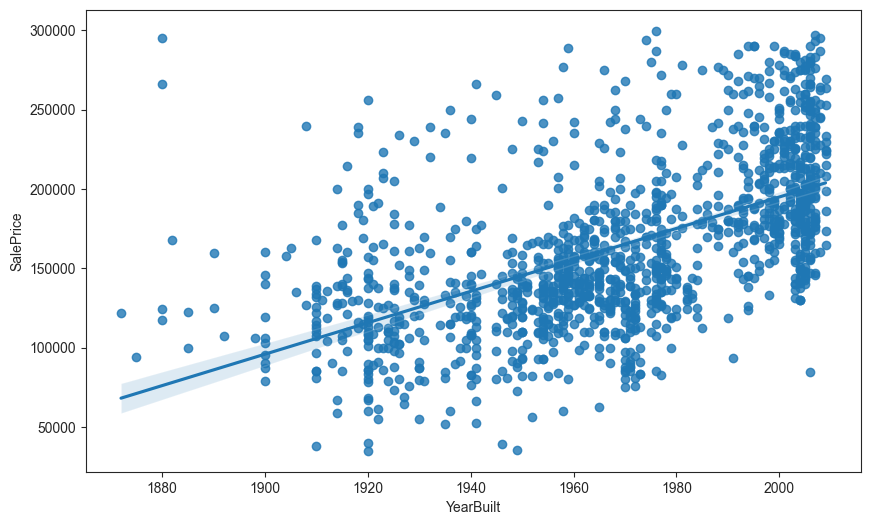

In [17]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x=df_train['YearBuilt'], y=df_train['SalePrice'])

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

# Drop missing values
year_built_sale_price_clean = df_train[['YearBuilt', 'SalePrice']].dropna()

# Train-Test split
train, test = train_test_split(year_built_sale_price_clean, test_size=0.2, random_state=42)

# Polynomial fit
poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly_train = poly_features.fit_transform(train[['YearBuilt']])
y_train = train[['SalePrice']]

X_poly_test = poly_features.fit_transform(test[['YearBuilt']])
y_test = test[['SalePrice']]

# Generate the model
linmodel = LinearRegression()

# Train the model
linmodel.fit(X_poly_train, y_train)

# Display intercept and coefficients
print(f"Intercept: {round(linmodel.intercept_[0], 2)}, Coefficients: {linmodel.coef_[0][0]}, {linmodel.coef_[0][1]}")

# Predictions
predictions = linmodel.predict(X_poly_test)

# R2 Score
print(f"R2 Score: {round(r2_score(y_true=y_test, y_pred=predictions), 2)}")

Intercept: 50473450.73, Coefficients: -52317.699378988356, 13.591313148043545
R2 Score: 0.4


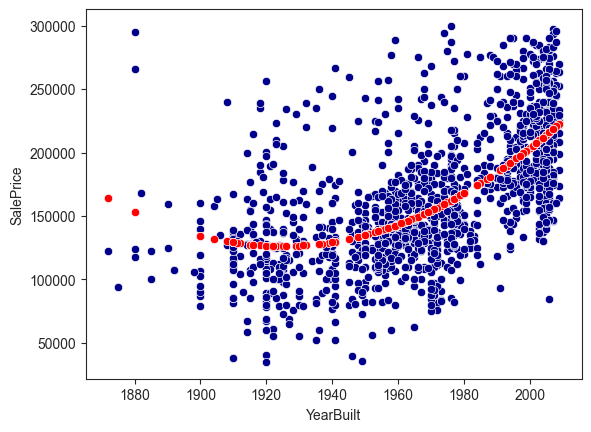

In [19]:
# Visualize data and polynomial regression
ax = sns.scatterplot(data=year_built_sale_price_clean, x='YearBuilt', y='SalePrice', c='DarkBlue', markers='o')
ax = sns.scatterplot(x=test['YearBuilt'], y=predictions.flatten(), c='Red', markers='x', ax=ax)

- The scatter plots and regression line suggest a linear dependency between the year a house was built and its sale price, i.e. the newer the house is the higher its sale price. 
- The polynomial regression model suggest that same, but its R2 score of 0.4 is low, so it seems to have difficulty explaining the pattern in the data in a reliable way. However, since I did not account for outliers, the dependency might still be true.

14. Perform a groupby operation to find the average 'SalePrice' per 'Neighborhood'.

In [20]:
round(df_train['SalePrice'].groupby(by=df_train['Neighborhood']).mean(), 3)

Neighborhood
Blmngtn    194870.882
Blueste    137500.000
BrDale     104493.750
BrkSide    124834.052
ClearCr    204685.846
CollgCr    193610.452
Crawfor    192172.467
Edwards    126282.525
Gilbert    188805.273
IDOTRR     100123.784
MeadowV     98576.471
Mitchel    156270.122
NAmes      144958.004
NPkVill    142694.444
NWAmes     189050.068
NoRidge    262809.500
NridgHt    234560.800
OldTown    123328.459
SWISU      142591.360
Sawyer     136793.135
SawyerW    179807.000
Somerst    210891.961
StoneBr    227500.000
Timber     216633.433
Veenker    213055.556
Name: SalePrice, dtype: float64

15. Create a correlation matrix for numerical features. Which features are most correlated with 'SalePrice'?

In [21]:
# Most positively correlated features with 'SalePrice'
# Create Correlation matrix with numerical features and 'SalePrice'
correlation_matrix = numerical_features.corr()

# Sort correlation values, remove 'SalePrice' column and reform into a DataFrame
correlated_sale_price = correlation_matrix['SalePrice'].sort_values(ascending=False).drop('SalePrice', axis=0).to_frame().reset_index()
correlated_sale_price.columns = ['feature', 'correlation with SalePrice']

# Display top 10 positive correlations
correlated_sale_price.head(10)

,feature,correlation with SalePrice
0,OverallQual,0.758716
1,GrLivArea,0.634131
2,GarageCars,0.606939
3,FullBath,0.580383
4,GarageArea,0.575679
5,YearBuilt,0.568304
6,YearRemodAdd,0.532921
7,TotalBsmtSF,0.511985
8,GarageYrBlt,0.502878
9,1stFlrSF,0.490776


In [22]:
# Display top 10 negative correlations
correlated_sale_price.tail(10)

,feature,correlation with SalePrice
26,3SsnPorch,0.051315
27,BsmtFinSF2,0.025971
28,BsmtHalfBath,-0.001854
29,MiscVal,-0.004415
30,OverallCond,-0.031035
31,YrSold,-0.037071
32,MSSubClass,-0.049983
33,LowQualFinSF,-0.053249
34,EnclosedPorch,-0.137548
35,KitchenAbvGr,-0.145673


16. Compare the distribution of 'SalePrice' between houses with and without central air conditioning.

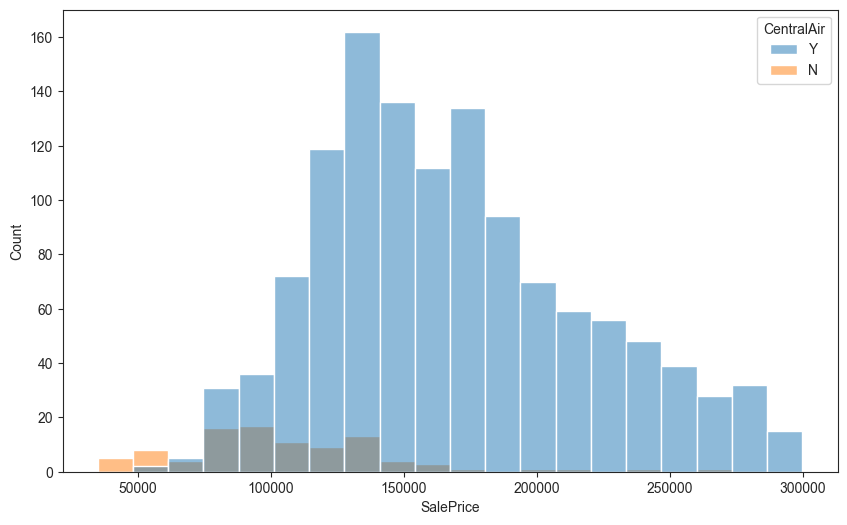

In [23]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df_train, x=df_train['SalePrice'], bins=20, hue='CentralAir')

##### Preliminary Conclusions:
1. Generally, there are more houses with central air-conditioning that without it.
2. Generally, houses with central air-conditioning tend to be pricier than those without.

17. Analyze if there is a significant difference in 'SalePrice' based on 'GarageType'.

In [24]:
from scipy.stats import f_oneway, tukey_hsd

# Group 'SalePrice' based on 'GarageType'
sale_price_grouped = df_train.groupby(by='GarageType')['SalePrice'].apply(list)

# Perform an ANOVA on the groups
f_statistic, p_value = f_oneway(*sale_price_grouped)

# Display results of ANOVA
print(f"F-statistic: {f_statistic}, p-value: {p_value}")

F-statistic: 85.72666998815441, p-value: 1.2285010532855905e-77


In [25]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Cleaning missing data
garage_type_cleaned = df_train['GarageType'].dropna()
sale_price_cleaned = df_train['SalePrice'][garage_type_cleaned.index]

# Perform a Tukey HSD test on 'SalePrice' and 'GarageType'
tukey = pairwise_tukeyhsd(endog=sale_price_cleaned, groups=garage_type_cleaned, alpha=0.05)

print(tukey)


       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
 group1  group2   meandiff  p-adj     lower        upper    reject
------------------------------------------------------------------
 2Types  Attchd  32466.9087 0.4614  -18808.2299  83742.0473  False
 2Types Basment  -1742.0556    1.0  -60723.3585  57239.2473  False
 2Types BuiltIn  55778.8636 0.0344    2428.2678 109129.4595   True
 2Types CarPort -41321.2222 0.4736 -107264.3236  24621.8791  False
 2Types  Detchd -19048.2292 0.8985  -70525.0462  32428.5878  False
 Attchd Basment -34208.9642 0.0139  -64037.5209  -4380.4076   True
 Attchd BuiltIn   23311.955 0.0005    7273.4147  39350.4953   True
 Attchd CarPort -73788.1309    0.0 -115733.8257 -31842.4361   True
 Attchd  Detchd -51515.1378    0.0  -59313.3034 -43716.9723   True
Basment BuiltIn  57520.9192    0.0   24250.9774   90790.861   True
Basment CarPort -39579.1667  0.233  -90658.4733    11500.14  False
Basment  Detchd -17306.1736 0.5741  -47480.0968  12867.7496  F

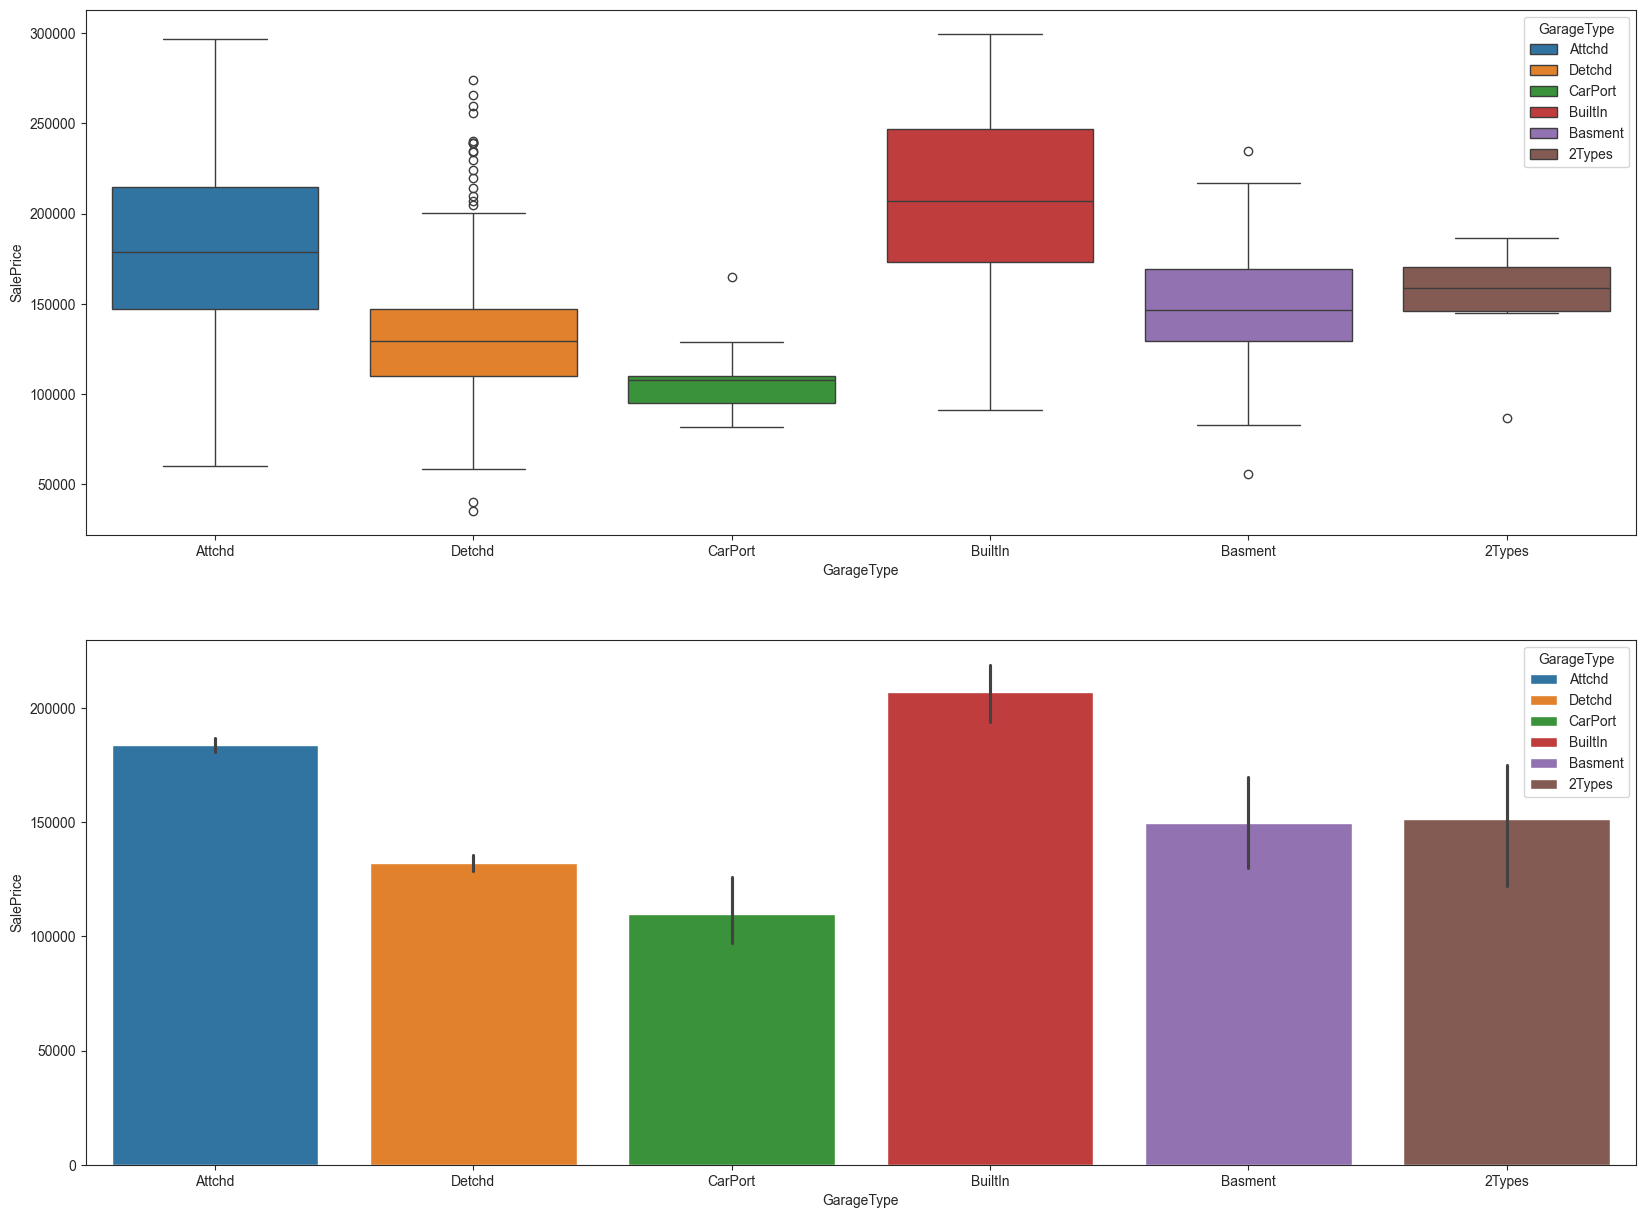

In [26]:
# Figure adjustments
fig, axes = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(20, 15)

# Bar plot
ax1 = sns.barplot(data=df_train, x='GarageType', y='SalePrice', hue='GarageType', ax=axes[1])

# Box plot 
ax2 =sns.boxplot(data=df_train, x='GarageType', y='SalePrice', hue='GarageType', ax=axes[0])

##### Preliminary Conclusions:
1. Based on the the results of the ANOVA test and the plots above, there is a general statistically significant difference in 'SalePrice' based on 'GarageType'.
2. Based on the results of the Tukey HSD test, 'SalePrice' is not significantly different across all 'GarageType' groups:
    - Statistically, the '2Types' group is only significantly different in 'SalePrice' from the 'BuiltIn' group.
    - Statistically, 'Basement', 'CarPort' and 'Detchd' are not significantly different from each other in terms of 'SalePrice'.
    - The results agree with the box plot above that shows two main groups that are different than the rest: 'BuiltIn' and 'Attchd'.

18. Investigate the effect of 'LotFrontage' on 'SalePrice'. Is there a trend?

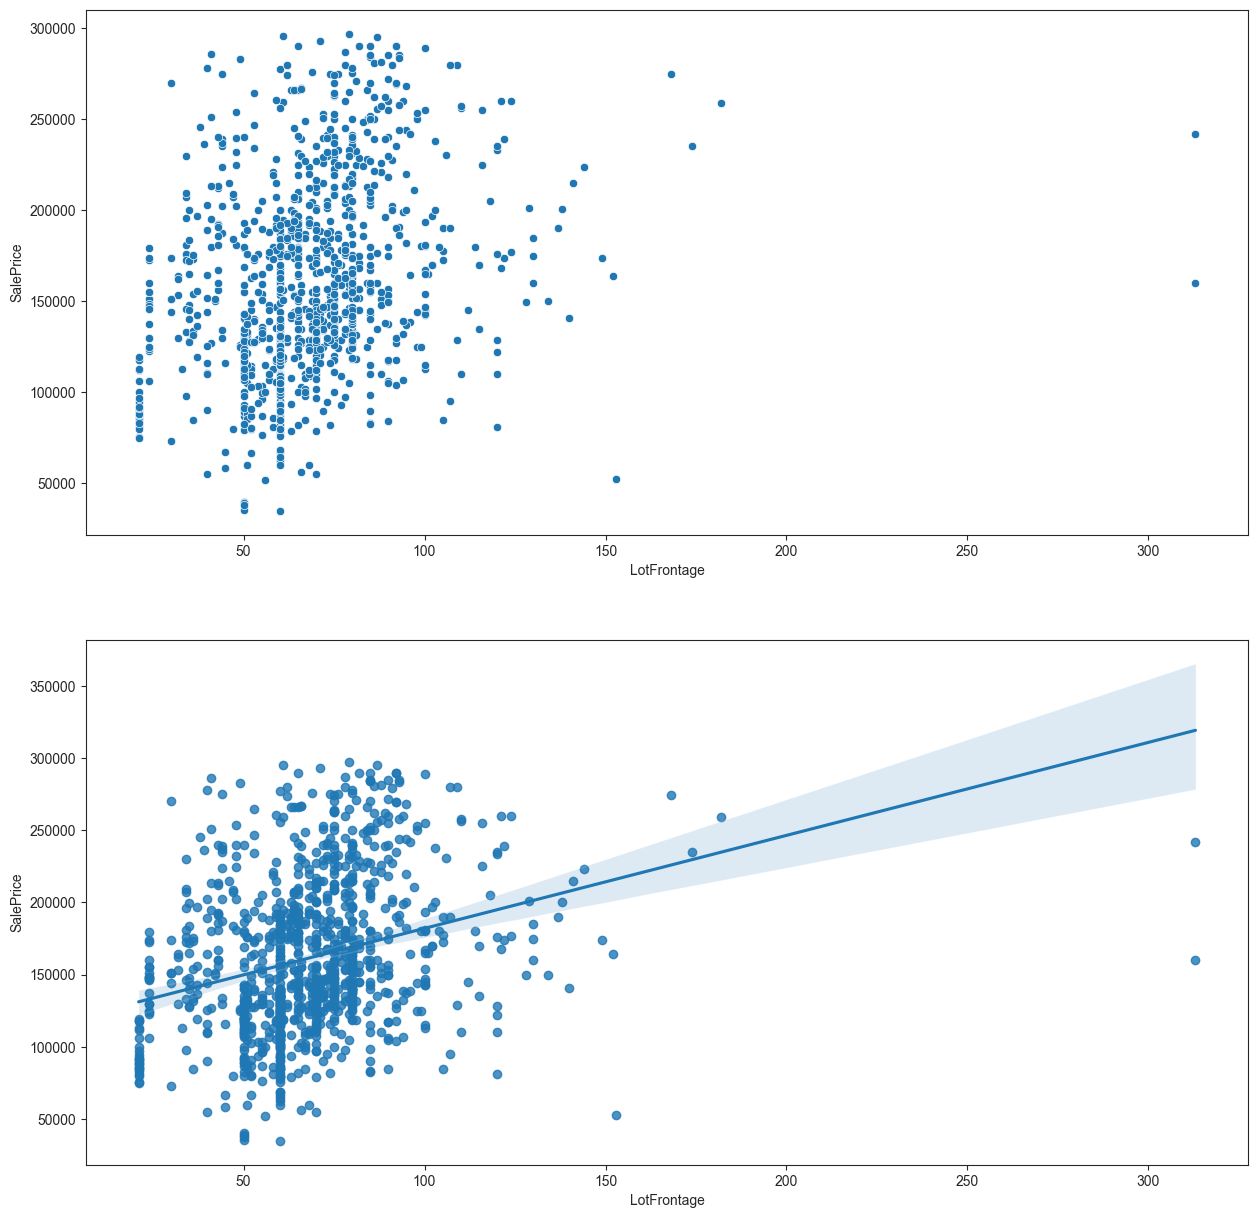

In [27]:
# Figure adjustments
fig, axes = plt.subplots(ncols=1, nrows=2)
fig.set_size_inches(15, 15)

# Scatter plots
ax3 = sns.scatterplot(data=df_train, x='LotFrontage', y='SalePrice', ax=axes[0])
ax4 = sns.regplot(data=df_train, x='LotFrontage', y='SalePrice', ax=axes[1])

In [28]:
# Drop missing values
lot_frontage_sale_price_clean = df_train[['LotFrontage', 'SalePrice']].dropna()

# Train-Test split
train, test = train_test_split(lot_frontage_sale_price_clean, test_size=0.2, random_state=42)

# Polynomial fit
poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly_train = poly_features.fit_transform(train[['LotFrontage']])
y_train = train[['SalePrice']]

X_poly_test = poly_features.fit_transform(test[['LotFrontage']])
y_test = test[['SalePrice']]

# Generate the model
linmodel = LinearRegression()

# Train the model
linmodel.fit(X_poly_train, y_train)

# Display intercept and coefficients
print(f"Intercept: {round(linmodel.intercept_[0], 2)}, Coefficients: {linmodel.coef_[0][0]}, {linmodel.coef_[0][1]}")

# Predictions
predictions = linmodel.predict(X_poly_test)

# R2 Score
print(f"R2 Score: {round(r2_score(y_true=y_test, y_pred=predictions), 3)}")

Intercept: 93584.32, Coefficients: 1226.2881334370365, -3.0917023880058387
R2 Score: 0.101


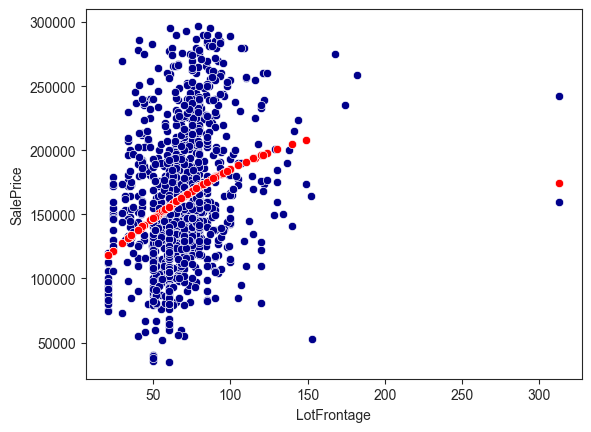

In [29]:
# Visualize data + predictions
ax = sns.scatterplot(data=lot_frontage_sale_price_clean, x='LotFrontage', y='SalePrice', c='DarkBlue', markers='o')
ax = sns.scatterplot(x=test['LotFrontage'], y=predictions.flatten(), c='Red', markers='x', ax=ax)

- The Scatter plots above suggest that there is no linear dependency between 'LotFrontage' and 'SalePrice'. A larger the number of linear feet of street connected to an apartment does not necessarily mean a higher sale price.
 - The polynomial regression model's performance also suggest the same, since the R2 score of 0.1 is very low and it is clear from the scattter plot that the polynomial line is not a good fir for the data.

19. Use a box plot to compare the 'SalePrice' distribution across different 'HouseStyle'.

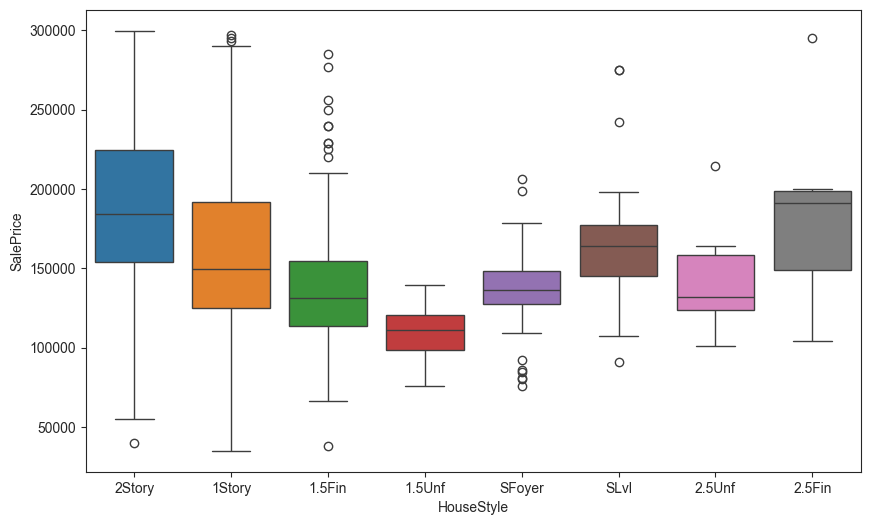

In [30]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df_train, x='HouseStyle', y='SalePrice', hue='HouseStyle')

20. Explore how 'OverallCond' affects the 'SalePrice'. Is better condition always associated with higher prices?

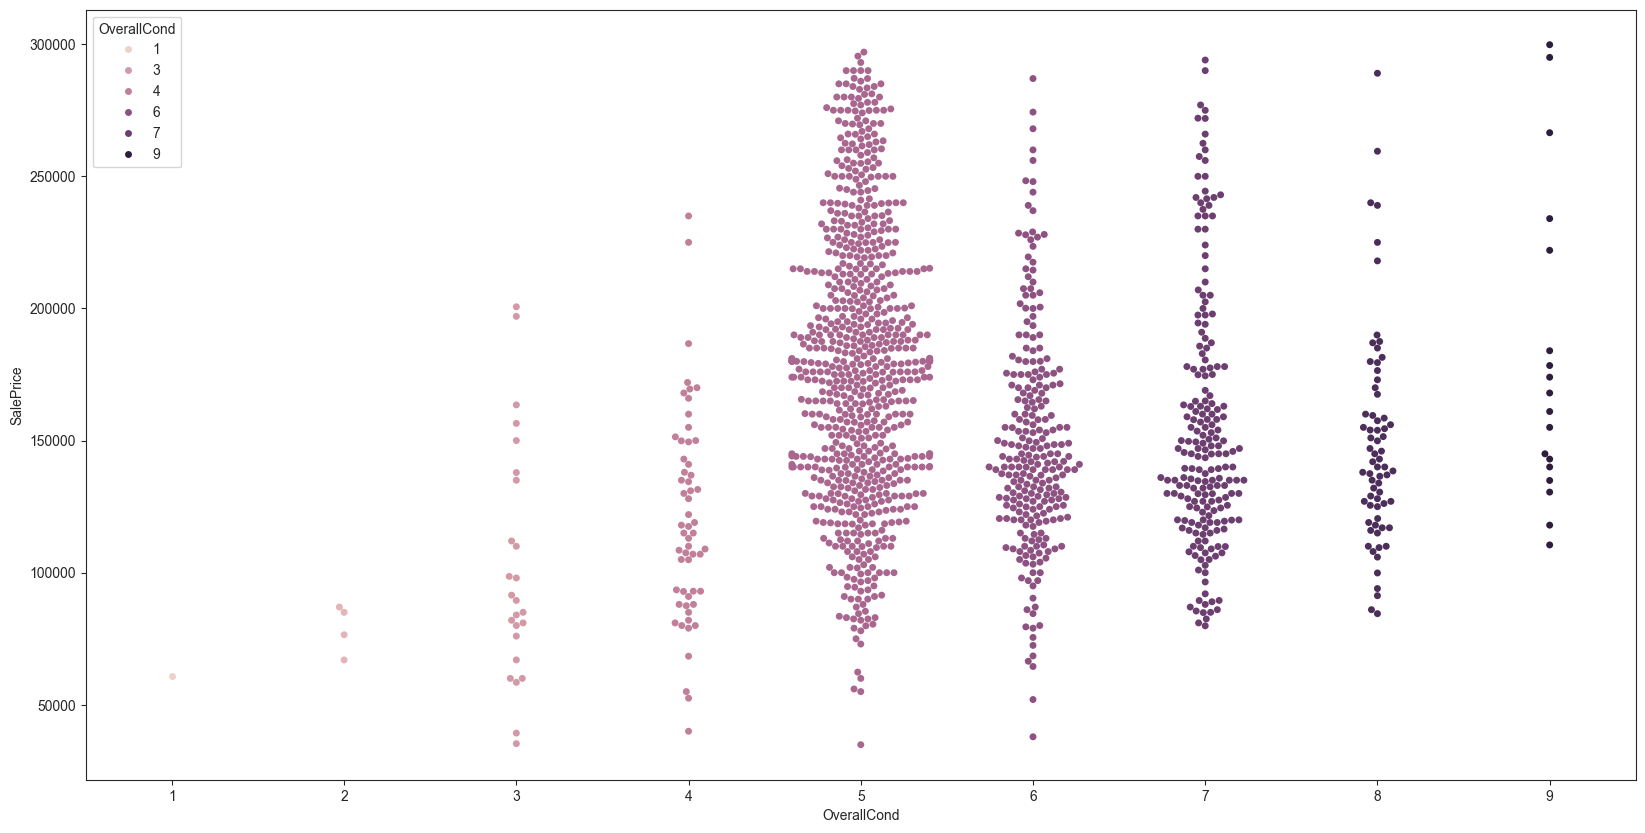

In [31]:
plt.figure(figsize=(20, 10))
ax5 = sns.swarmplot(data=df_train, x='OverallCond', y='SalePrice', hue='OverallCond')

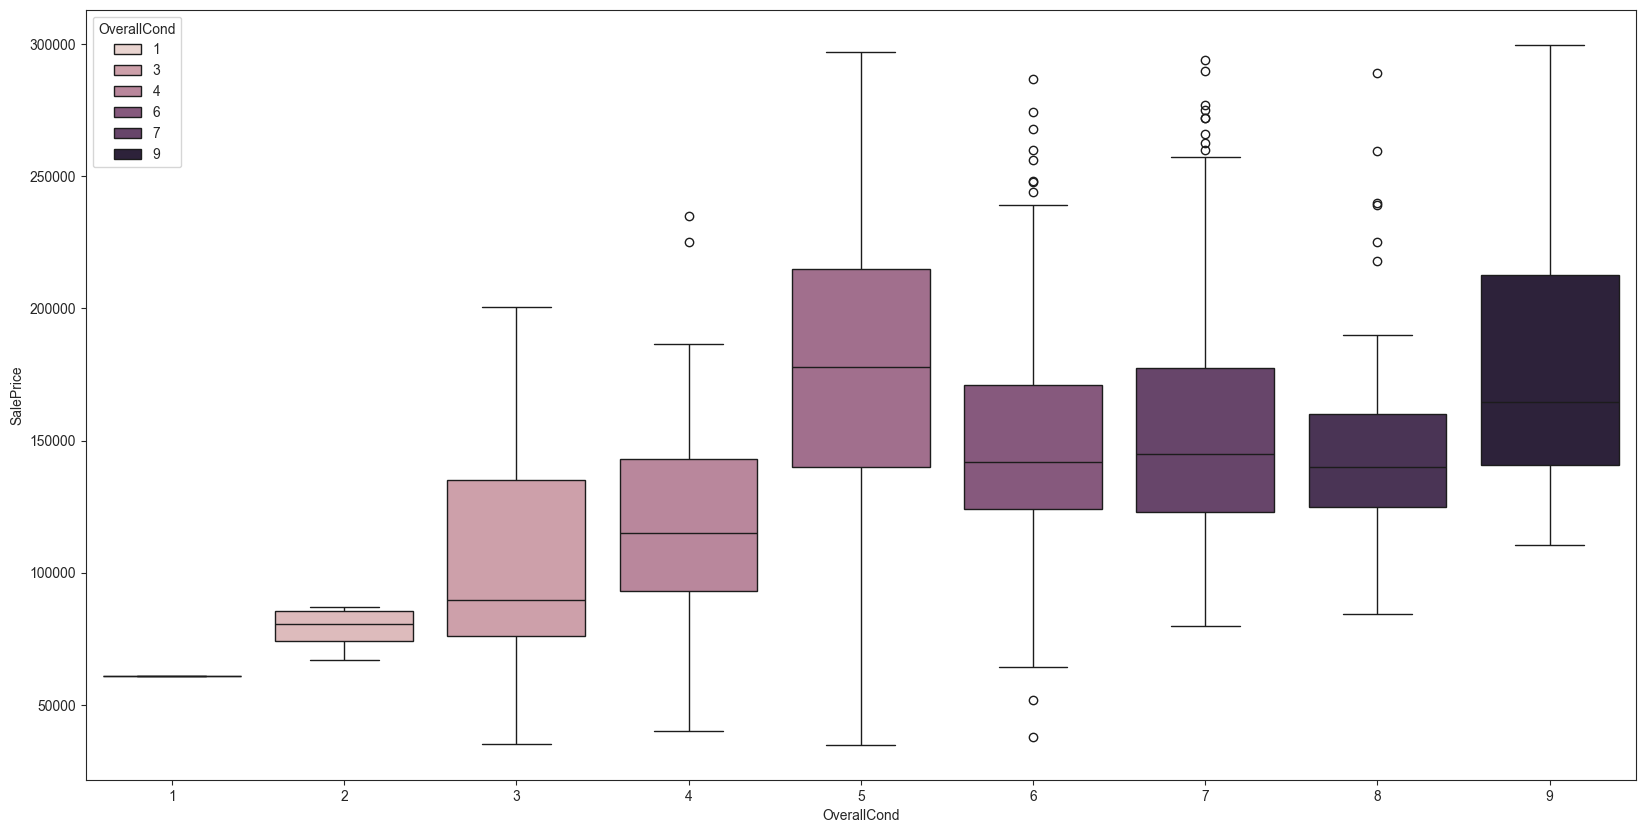

In [32]:
plt.figure(figsize=(20, 10))
ax = sns.boxplot(data=df_train, x='OverallCond', y='SalePrice', hue='OverallCond')

In [103]:
len(df_train['OverallCond'].unique())

array([5, 8, 6, 7, 4, 2, 3, 9, 1], dtype=int64)

In [140]:
import scipy.stats as stats

def test_difference(columns, alpha=0.05):
    for x in columns:
    # Cleaning missing data
        X_cleaned = df_train[x].dropna()
        sale_price_cleaned = df_train['SalePrice'][X_cleaned.index]
        
    # Calculate number of observations and groups for F-critical
        n_observations = len(df_train[x])
        k_groups = len(df_train[x].unique())
        
    # Group 'SalePrice' based on column X
        grouped = df_train.groupby(by=x)['SalePrice'].apply(list)
    
    # Perform an ANOVA on the groups
        f_statistic, p_value = f_oneway(*grouped)
        
    # Calculate F-critical
        df1 = k_groups - 1 # Number of groups minus 1
        df2 = n_observations - k_groups # Total number of observations minus number of groups
        critical_value = stats.f.ppf(1 - alpha, df1, df2)
    
    # Determine significance of F-statistic
        if f_statistic > critical_value:
            f_significance = 'Significant'
            
            # Perform a Tukey HSD test on 'SalePrice' and X    
            tukey = pairwise_tukeyhsd(endog=sale_price_cleaned, groups=X_cleaned, alpha=0.05)
            
        else:
            f_significance = 'Not significant'
            tukey = 'No need for Tukey HSD'       
    
    # Display results of ANOVA
        print(f"\033[1m\033[4m{x}\033[0m column vs. SalePrice: F-statistic: {f_statistic} ({f_significance}), p-value: {p_value}\n")
        print(tukey)
    

In [141]:
test_difference(['OverallCond'])

OverallCond column vs. SalePrice: F-statistic: 26.996838797480613 (Significant), p-value: 4.682770397624025e-39

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
     1      2     17875.0    1.0 -150518.8601 186268.8601  False
     1      3     40929.4  0.996 -112669.4329 194528.2329  False
     1      4  59438.4386 0.9532  -92493.0577 211369.9349  False
     1      5 118357.0444 0.2632  -32363.4161 269077.5049  False
     1      6  87960.5685 0.6751  -62958.8347 238879.9718  False
     1      7  94261.5099 0.5861  -56726.8891  245249.909  False
     1      8  87410.5072 0.6889  -64293.0347 239114.0492  False
     1      9 120088.8889 0.2786  -34654.3896 274832.1674  False
     2      3     23054.4 0.9938  -58054.8237 104163.6237  False
     2      4  41563.4386 0.7723  -36342.1728   119469.05  False
     2      5 100482.0444 0.0013   24965.4

While 'OverallCond' does affects the 'SalePrice', the plots above demonstrate the the relationship is not linear or consistent. A better condition is not necessarily associated with higher prices e.g., Both visually and statistically, the average 'SalePrice' of 'OverallCond' 6 is significantly lower than that of 'OverallCond' 5 and should be even lower given the large number of high price outliers displayed in the box plot.    

### Hard Questions (Learning from Data through EDA)

21. What features strongly influence the 'SalePrice'? Justify with statistical evidence.

22. Is there a pattern between the number of bedrooms ('BedroomAbvGr') and the sale price? Analyze and interpret.

<Figure size 2000x600 with 0 Axes>

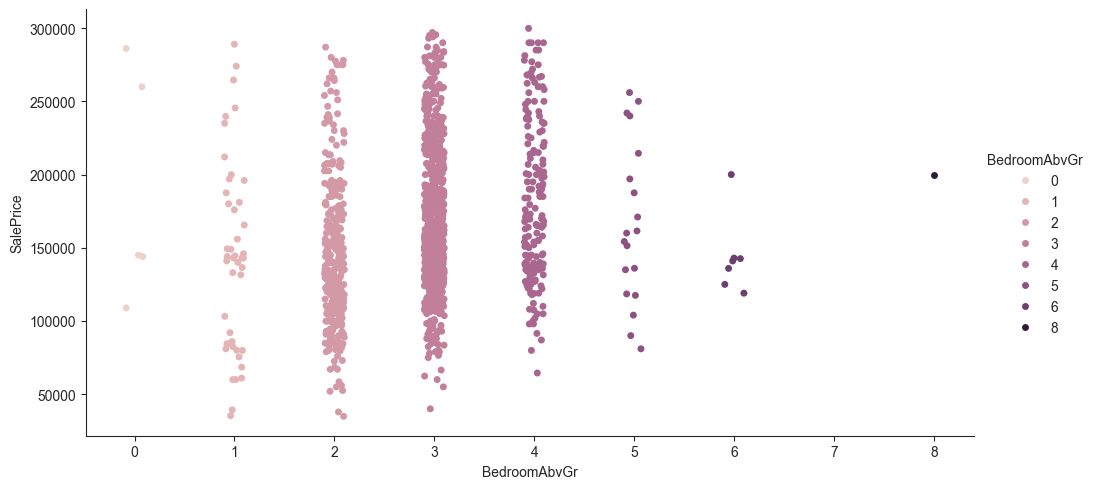

In [72]:
fig = plt.figure(figsize=(20, 6))
ax = sns.catplot(df_train, x='BedroomAbvGr', y='SalePrice', hue='BedroomAbvGr', height=5, aspect=2, native_scale=True, legend='full')

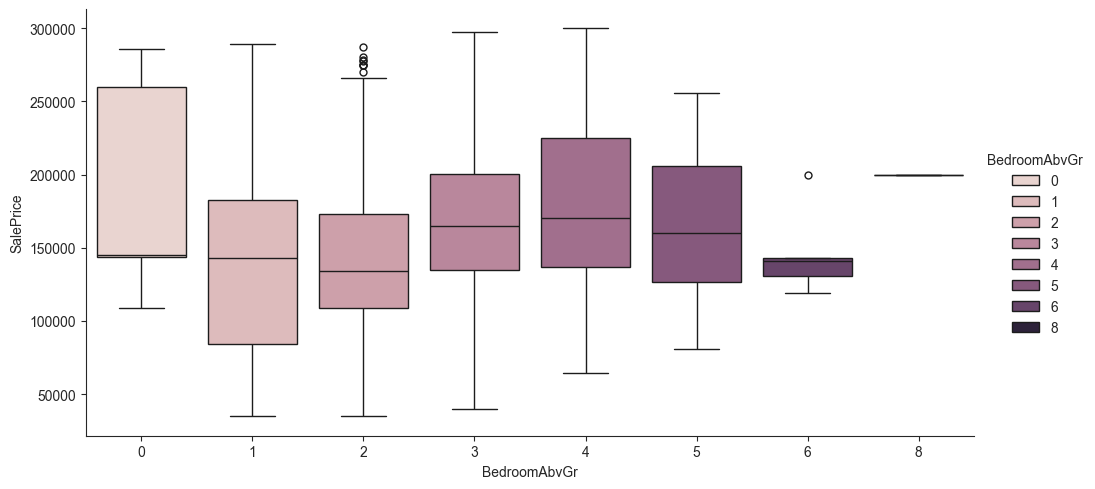

In [71]:
ax = sns.catplot(df_train, x='BedroomAbvGr', y='SalePrice', hue='BedroomAbvGr', height=5, aspect=2, kind='box', legend='full')

In [142]:
test_difference(['BedroomAbvGr'])

BedroomAbvGr column vs. SalePrice: F-statistic: 14.428443053763209 (Significant), p-value: 3.4609058948477887e-18

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
     0      1 -44906.3909 0.5585  -117060.366  27247.5842  False
     0      2 -45430.3506 0.4807 -114310.8221  23450.1209  False
     0      3 -18246.8898 0.9927  -86845.9406  50352.1609  False
     0      4  -7026.9591    1.0  -76364.9915  62311.0733  False
     0      5 -22097.0632 0.9884  -98942.3756  54748.2493  False
     0      6    -45012.8 0.7932 -134534.8798  44509.2798  False
     0      8     11208.2    1.0 -156272.2756 178688.6756  False
     1      2   -523.9597    1.0  -25035.4312  23987.5118  False
     1      3  26659.5011 0.0152    2950.3752   50368.627   True
     1      4  37879.4318 0.0002    12110.155  63648.7086   True
     1      5  22809.3278 0.7197  -19160

- The ANOVA test and box plot show that there is no consistent significant difference in 'SalePrice' based on the number of bedrooms ('BedroomAbvGr').
- There is a statistically significant difference in 'SalePrice' for houses with 1 or 2 bedrooms versus those with 3 or 4. 

23. Identify outliers in 'GrLivArea' and discuss how they might affect the model.

24. Explore the possibility of new feature creation. For instance, combine 'TotalBsmtSF' and '1stFlrSF' into a new feature and analyze its impact.

25. Discuss the potential effect of multicollinearity in the dataset.

26. Evaluate the relationship between 'SalePrice' and categorical variables like 'MSZoning'. How can these insights guide feature engineering?

27. Predict if a house has a 'FireplaceQu' based on its 'SalePrice'. What patterns do you observe?

28. Investigate how seasonal factors (like month of sale) impact 'SalePrice'.

<Figure size 1000x600 with 0 Axes>

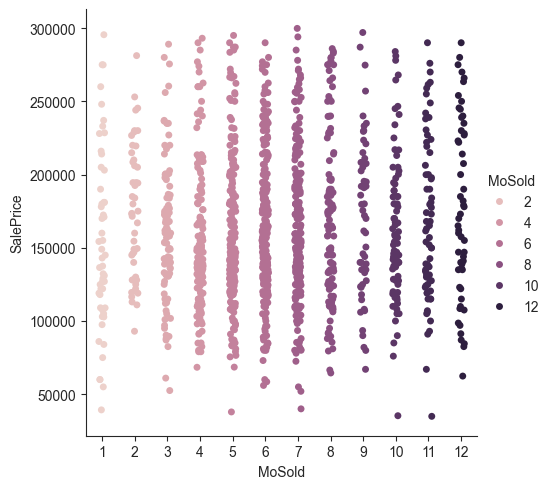

In [133]:
plt.figure(figsize=(10, 6))
ax = sns. catplot(df_train, x='MoSold', y='SalePrice', hue='MoSold')

In [143]:
test_difference(['MoSold'])

MoSold column vs. SalePrice: F-statistic: 1.1679471680299247 (Not significant), p-value: 0.3046489872195349

No need for Tukey HSD


 - Both the plot and ANOVA test show that show that there is no significant difference is 'SalePrice' between months where the houses were sold in ('MoSold').
 - Therefore, 'MoSold' has minimal to no impact on 'SalePrice'.

29. Can 'BsmtQual' and 'BsmtCond' be combined into a single feature for a more effective analysis? Provide statistical reasoning.

30. Explore the effect of remodeling ('YearRemodAdd') on 'SalePrice'. Does recent remodeling significantly increase the house value? 

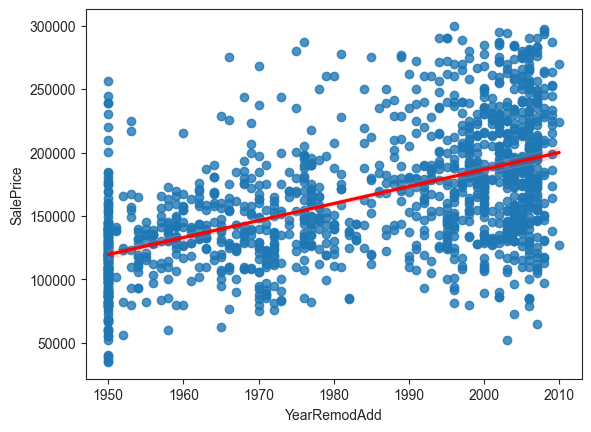

In [120]:
ax = sns.regplot(df_train, x='YearRemodAdd', y='SalePrice', line_kws={'color':'Red'})